# Workhsop 2
## Date 23/10/2024

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df= pd.read_csv("./Dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data Preprocessing and EDA

In [8]:
# Seperate the independent and dependent variables
# by normal conventions the variable containg the features will be Capitalized
# and the variables containg the target will be in Simpe letters
X = df.drop('charges', axis=1) #X will have the features
y = df.charges #y will have the target

In [9]:
#Display first five rows of the features
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [11]:
# Display first five targets
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_valtrain, X_test, y_valtrain, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [13]:
X_valtrain.describe()

,age,bmi,children
count,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686
std,14.039105,6.013107,1.204619
min,18.000000,15.960000,0.000000
25%,27.000000,26.210000,0.000000
50%,39.000000,30.200000,1.000000
75%,51.000000,34.430000,2.000000
max,64.000000,53.130000,5.000000


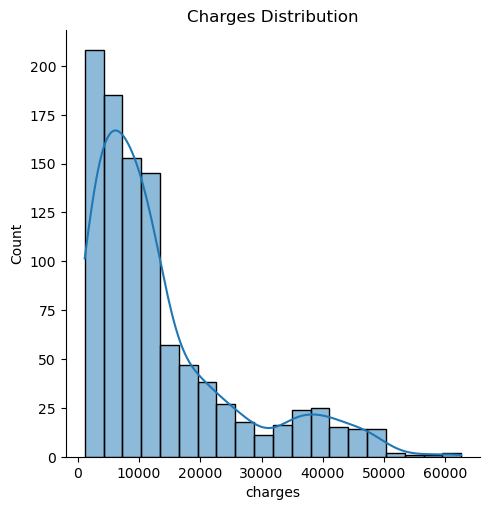

In [14]:
#Check for the charges distribution

sns.displot(y_valtrain, kde=True, bins = 20).set(title = "Charges Distribution")
# plt.show() #this is useful outside of notebooks, because notebooks will automatically display created graphs, but outside of notebooks this will be needed

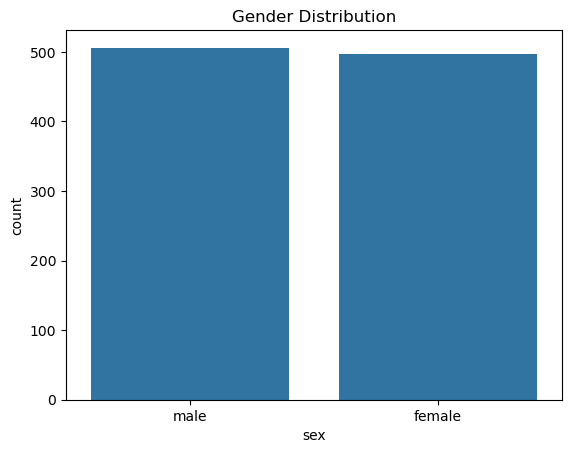

In [15]:
# Check for the gender distribution

sns.countplot(x = X_valtrain.sex).set(title = "Gender Distribution")
plt.show()

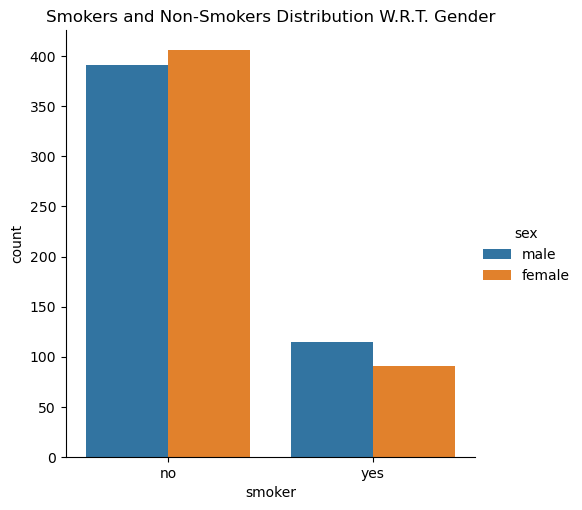

In [16]:
# Check for the smoker distribution between genders

sns.catplot(x="smoker", kind="count", hue= "sex", data=X_valtrain).set(title="Smokers and Non-Smokers Distribution W.R.T. Gender")
plt.show()

In [17]:
# Check for the charges distribution for smokers anad non smolers seperately
# But we have dropped the charges colum before, therefore, we need to concatanate

df_temp_train = pd.concat([X_valtrain, y_valtrain], axis = 1) # a temporary data frame that we create for usage in next section
df_temp_train.head()

,age,sex,bmi,children,smoker,region,charges
693,24,male,23.655,0,no,northwest,2352.96845
1297,28,female,26.510,2,no,southeast,4340.44090
634,51,male,39.700,1,no,southwest,9391.34600
1022,47,male,36.080,1,yes,southeast,42211.13820
178,46,female,28.900,2,no,southwest,8823.27900


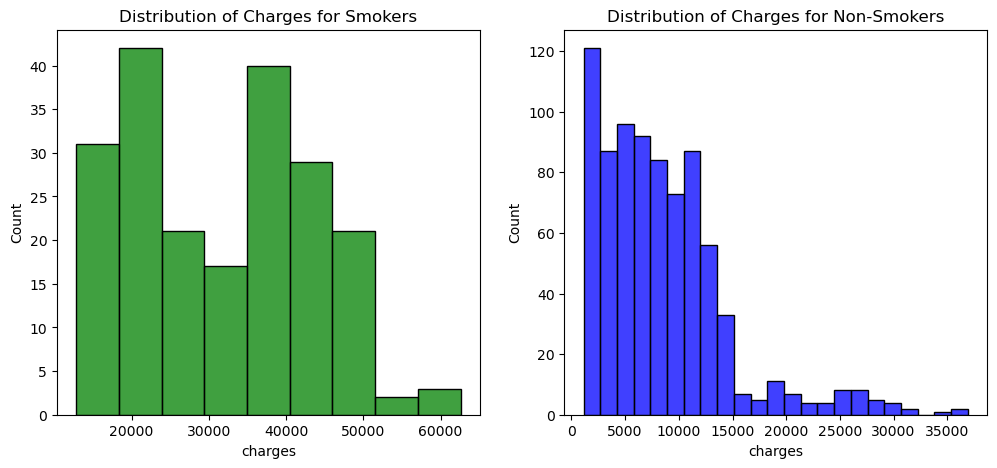

In [18]:
fig = plt.figure(figsize=(12,5))

ax=fig.add_subplot(121)
sns.histplot(df_temp_train[(df_temp_train.smoker == "yes")]["charges"],color='g',ax=ax)
ax.set_title("Distribution of Charges for Smokers")

ax=fig.add_subplot(122)
sns.histplot(df_temp_train[(df_temp_train.smoker == 'no')]['charges'],color='b', ax=ax)
ax.set_title('Distribution of Charges for Non-Smokers')

plt.show()